<a href="https://colab.research.google.com/github/rishabhgupta592/credit_approval_prediction/blob/main/CreditCardApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("simpl_payments_bank_digicard_v1.0.csv")
org_data = data.copy()
data

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,"45424 Norris Common Apt. 390\r\nNorth Mike, AR...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
1,519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,"5022 Rebecca Haven Apt. 258\r\nThompsonfurt, C...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,"8780 Brown Loaf Apt. 099\r\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R
3,91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,721 Jackson Extensions Suite 995\r\nNew Tarasi...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,"935 Burch Divide\r\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,6f5de269-e3b6-4aa0-84a5-e2ab5d3e455c,Male,1976-01-06,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,60.0,1,"38911 Heather Ranch\r\nEast Carolyn, ND 59814",jack72@richards.com,7.0,PVT,5,NaN,1.0,R
45218,e8e5fd1d-ef19-4652-b6e7-5ba18449e80e,Male,1977-01-05,Private,Prof-school,15.0,Married-spouse-absent,Prof-specialty,Not-in-family,99999.0,0.0,40.0,1,20346 Fitzpatrick Prairie Suite 117\r\nWeaverh...,jason17@johnson-williams.org,7.0,PVT,5,NaN,1.0,R
45219,1b3ed3e9-0283-4ba4-a7c7-f608f03f296e,Male,1964-01-09,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,45.0,1,"653 Valerie Cliffs Suite 914\r\nPort Hannah, D...",qdaniels@hotmail.com,13.0,NBF,189,NaN,1.0,I
45220,642859b2-f587-48ef-a5b1-89710301fc71,Male,1979-01-05,Private,Bachelors,13.0,Married-civ-spouse,Craft-repair,Husband,99999.0,0.0,40.0,1,"6957 Daniel Avenue\r\nWest Jason, VA 80167",whitakersteven@yahoo.com,7.0,PVT,5,NaN,1.0,R


# Data Exploration

In [ ]:
data.columns

Index(['user_id', 'gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'address',
       'email', 'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               45222 non-null  object 
 1   gender                45222 non-null  object 
 2   date_of_birth         45222 non-null  object 
 3   workclass             45222 non-null  object 
 4   education_level       45222 non-null  object 
 5   education_num         45222 non-null  float64
 6   marital_status        45222 non-null  object 
 7   occupation            45222 non-null  object 
 8   relationship          45222 non-null  object 
 9   capital_gain          45222 non-null  float64
 10  capital_loss          45222 non-null  float64
 11  hours_per_week        45222 non-null  float64
 12  approved              45222 non-null  int64  
 13  address               45222 non-null  object 
 14  email                 45222 non-null  object 
 15  inquiry_purpose_cod

In [ ]:
data.describe()

,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,43931.000000,45222.000000,45140.000000
mean,10.118460,1101.430344,88.595418,40.938017,0.247844,28.936560,79.807019,1.063735
std,2.552881,7506.430084,404.956092,12.007508,0.431766,35.393095,143.951963,0.711637
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000
25%,9.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
50%,10.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
75%,13.000000,0.000000,0.000000,45.000000,0.000000,16.000000,173.000000,1.000000
max,16.000000,99999.000000,4356.000000,99.000000,1.000000,99.000000,999.000000,19.000000


In [ ]:
data.isnull().sum()

user_id                     0
gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
address                     0
email                       0
inquiry_purpose_code     1291
institute_type              0
account_type                0
asset_class_cd          35730
asset_code                 82
portfolio_type              6
dtype: int64

In [ ]:
# Checking Non-Numerical Columns
cat_columns = data.columns[(data.dtypes =='object').values].tolist()
cat_columns

['user_id',
 'gender',
 'date_of_birth',
 'workclass',
 'education_level',
 'marital_status',
 'occupation',
 'relationship',
 'address',
 'email',
 'institute_type',
 'asset_class_cd',
 'portfolio_type']

In [ ]:
# Checking Numerical Columns
data.columns[(data.dtypes !='object').values].tolist()

['education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'approved',
 'inquiry_purpose_code',
 'account_type',
 'asset_code']

In [ ]:
# Dropping not releveant columns
data.drop(['user_id', 'address', 'email'], axis=1, inplace=True)
# address pin code binnig can be done, to convert into categorical variable like [urban/metro/rural]
data

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,7.0,PVT,5,NaN,1.0,R
1,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,13.0,NBF,5,NaN,1.0,R
2,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,13.0,NBF,5,NaN,1.0,R
3,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,13.0,NBF,5,NaN,1.0,R
4,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,13.0,PVT,47,S,1.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,Male,1976-01-06,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,60.0,1,7.0,PVT,5,NaN,1.0,R
45218,Male,1977-01-05,Private,Prof-school,15.0,Married-spouse-absent,Prof-specialty,Not-in-family,99999.0,0.0,40.0,1,7.0,PVT,5,NaN,1.0,R
45219,Male,1964-01-09,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,45.0,1,13.0,NBF,189,NaN,1.0,I
45220,Male,1979-01-05,Private,Bachelors,13.0,Married-civ-spouse,Craft-repair,Husband,99999.0,0.0,40.0,1,7.0,PVT,5,NaN,1.0,R


In [ ]:
# checking dupicate on all coulmns
duplicate = data[data.duplicated()]
duplicate

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
783,Male,1969-01-07,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,0,7.0,PVT,5,NaN,1.0,R
1744,Male,1991-01-02,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,0,13.0,NBF,189,NaN,1.0,I
2135,Male,1981-01-04,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,0,13.0,PVT,5,NaN,1.0,R
2799,Female,2002-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,20.0,0,13.0,NBF,5,NaN,1.0,R
3014,Male,1969-01-07,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,0,13.0,NBF,5,NaN,1.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43772,Male,1964-01-09,Federal-gov,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,7688.0,0.0,40.0,1,99.0,PVT,5,NaN,1.0,R
43830,Male,1976-01-06,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,7688.0,0.0,50.0,1,99.0,PVT,5,NaN,1.0,R
44606,Male,1983-01-04,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,15024.0,0.0,40.0,1,7.0,PVT,5,NaN,1.0,R
44626,Male,1977-01-05,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,15024.0,0.0,50.0,1,7.0,PVT,5,NaN,1.0,R


In [ ]:
data.drop_duplicates(keep = 'last', inplace = True)
data

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,7.0,PVT,5,NaN,1.0,R
1,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,13.0,NBF,5,NaN,1.0,R
2,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,13.0,NBF,5,NaN,1.0,R
3,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,13.0,NBF,5,NaN,1.0,R
4,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,13.0,PVT,47,S,1.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,Male,1976-01-06,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,60.0,1,7.0,PVT,5,NaN,1.0,R
45218,Male,1977-01-05,Private,Prof-school,15.0,Married-spouse-absent,Prof-specialty,Not-in-family,99999.0,0.0,40.0,1,7.0,PVT,5,NaN,1.0,R
45219,Male,1964-01-09,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,99999.0,0.0,45.0,1,13.0,NBF,189,NaN,1.0,I
45220,Male,1979-01-05,Private,Bachelors,13.0,Married-civ-spouse,Craft-repair,Husband,99999.0,0.0,40.0,1,7.0,PVT,5,NaN,1.0,R


In [ ]:
# converting DOB to age
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
data['Age'] = data['date_of_birth'].apply(age)
data.drop(['date_of_birth'], axis=1, inplace=True)
data['Age']

0        34
1        51
2        48
3        19
4        35
         ..
45217    45
45218    44
45219    57
45220    42
45221    44
Name: Age, Length: 44213, dtype: int64

In [ ]:
# Checking unique values from Categorical Columns
for i in data.columns[(data.dtypes =='object').values].tolist():
    print(i,'\n')
    print(data[i].value_counts())
    print('-----------------------------------------------')

gender 

 Male      29746
 Female    14467
Name: gender, dtype: int64
-----------------------------------------------
workclass 

 Private             32347
 Self-emp-not-inc     3783
 Local-gov            3084
 State-gov            1942
 Self-emp-inc         1637
 Federal-gov          1399
 Without-pay            21
Name: workclass, dtype: int64
-----------------------------------------------
education_level 

 HS-grad         14241
 Some-college     9682
 Bachelors        7410
 Masters          2494
 Assoc-voc        1949
 11th             1589
 Assoc-acdm       1505
 10th             1211
 7th-8th           823
 Prof-school       783
 9th               674
 12th              570
 Doctorate         542
 5th-6th           446
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64
-----------------------------------------------
marital_status 

 Married-civ-spouse       20495
 Never-married            14202
 Divorced                  6250
 Separated          

In [ ]:
data["Age"].describe()

count    44213.000000
mean        39.672020
std         13.235581
min         18.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         91.000000
Name: Age, dtype: float64

## Visualization

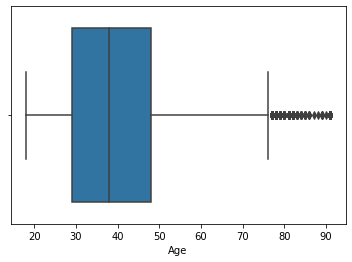

In [ ]:
sns.boxplot(data['Age'])

## Outlier removal

In [ ]:
# high_bound = data['Age'].quantile(0.99)
# print('high_bound :', high_bound)
# low_bound = data['Age'].quantile(0.1)
# print('low_bound :', low_bound)

# Inter quartile range (IQR) method
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
data['Age'] = remove_outlier_IQR (data['Age'])
data = data[data['Age'].notna()]
data["Age"].describe()

count    43944.000000
mean        39.412343
std         12.846189
min         18.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         76.000000
Name: Age, dtype: float64

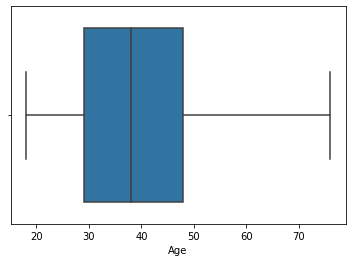

In [ ]:
sns.boxplot(data['Age'])

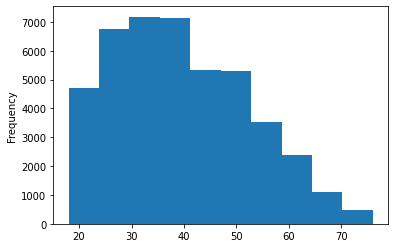

In [ ]:
data['Age'].plot(kind='hist')
# This graph shows that, majority of applicatant's are 20 to 55 years old

## Geneder Distribution

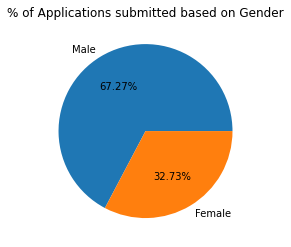

In [ ]:
plt.pie(data['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

 Male      20265
 Female    12721
Name: gender, dtype: int64


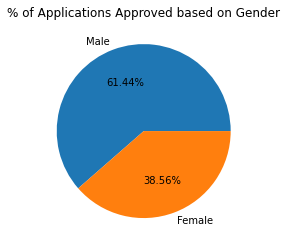

In [ ]:
# This graph shows that, majority of application are approved for Female's
print(data[data['approved']==0]['gender'].value_counts())
plt.pie(data[data['approved']==0]['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()


In [ ]:
def get_pie_chart(df, variable, title):
  print(df[variable].value_counts())
  print("#"*30)
  # This graph shows that, majority of applicatant's are working professional
  plt.figure(figsize = (8,8))
  plt.pie(df[variable].value_counts(), labels=data[variable].value_counts().index, autopct='%1.2f%%')
  plt.title(title)
  plt.legend()
  plt.show()

 Private             32200
 Self-emp-not-inc     3718
 Local-gov            3058
 State-gov            1940
 Self-emp-inc         1612
 Federal-gov          1395
 Without-pay            21
Name: workclass, dtype: int64
##############################


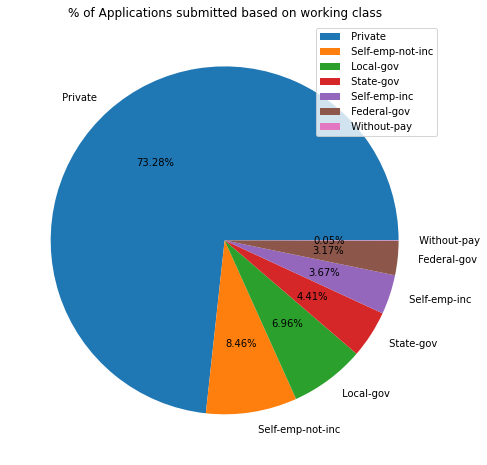

In [ ]:
# # workclass
get_pie_chart(data, "workclass", "% of Applications submitted based on working class")

 HS-grad         14158
 Some-college     9645
 Bachelors        7376
 Masters          2480
 Assoc-voc        1945
 11th             1582
 Assoc-acdm       1502
 10th             1204
 7th-8th           783
 Prof-school       773
 9th               666
 12th              567
 Doctorate         535
 5th-6th           440
 1st-4th           217
 Preschool          71
Name: education_level, dtype: int64
##############################


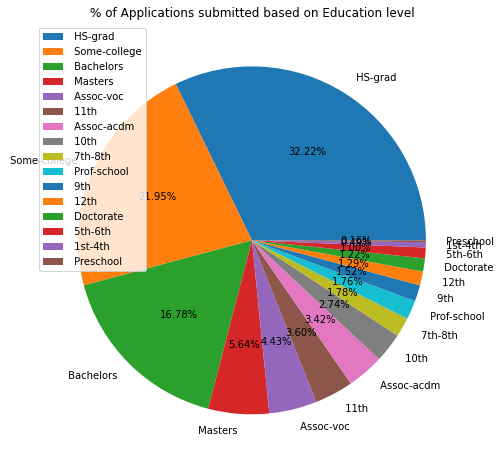

In [ ]:
# education_level
# Dropping as not required, already mapping is available.
get_pie_chart(data, "education_level", "% of Applications submitted based on Education level")
data.drop(['education_level'], axis=1, inplace=True)


9.0     14158
10.0     9645
13.0     7376
14.0     2480
11.0     1945
7.0      1582
12.0     1502
6.0      1204
4.0       783
15.0      773
5.0       666
8.0       567
16.0      535
3.0       440
2.0       217
1.0        71
Name: education_num, dtype: int64
##############################


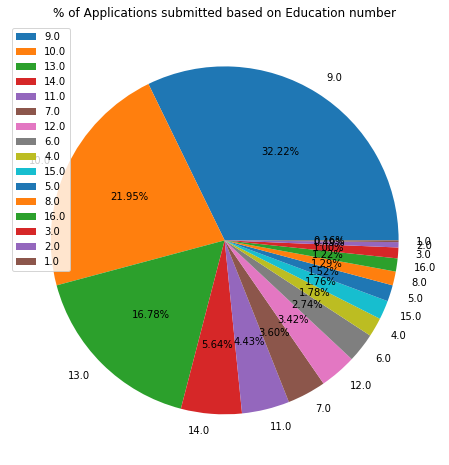

In [ ]:
# education_num
get_pie_chart(data, "education_num", "% of Applications submitted based on Education number")

 Married-civ-spouse       20368
 Never-married            14167
 Divorced                  6237
 Separated                 1408
 Widowed                   1187
 Married-spouse-absent      545
 Married-AF-spouse           32
Name: marital_status, dtype: int64
##############################


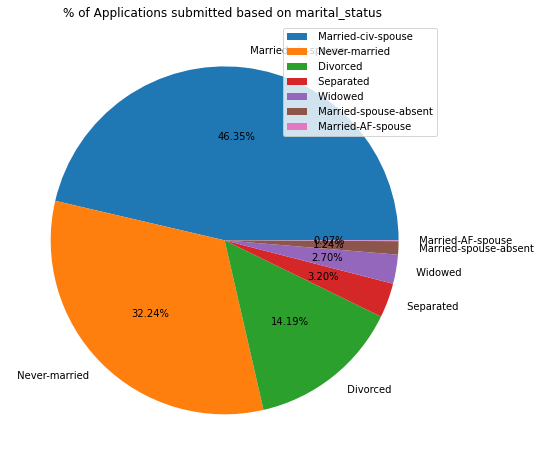

In [ ]:
# marital_status
get_pie_chart(data, "marital_status", "% of Applications submitted based on marital_status ")

 Prof-specialty       5887
 Exec-managerial      5839
 Craft-repair         5705
 Adm-clerical         5389
 Sales                5278
 Other-service        4695
 Machine-op-inspct    2828
 Transport-moving     2277
 Handlers-cleaners    1984
 Farming-fishing      1445
 Tech-support         1414
 Protective-serv       965
 Priv-house-serv       224
 Armed-Forces           14
Name: occupation, dtype: int64
##############################


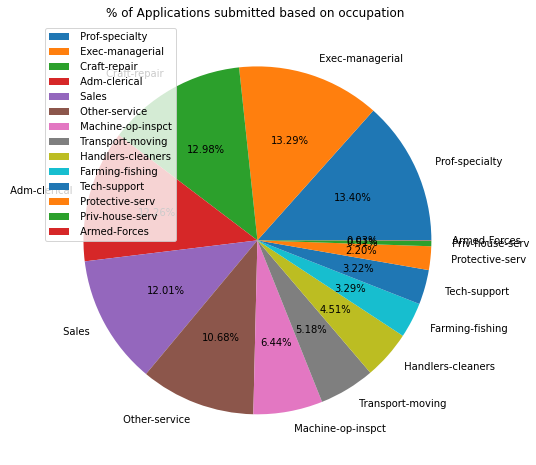

In [ ]:
# occupation
get_pie_chart(data, "occupation", "% of Applications submitted based on occupation ")

 Husband           17996
 Not-in-family     11438
 Own-child          6368
 Unmarried          4727
 Wife               2075
 Other-relative     1340
Name: relationship, dtype: int64
##############################


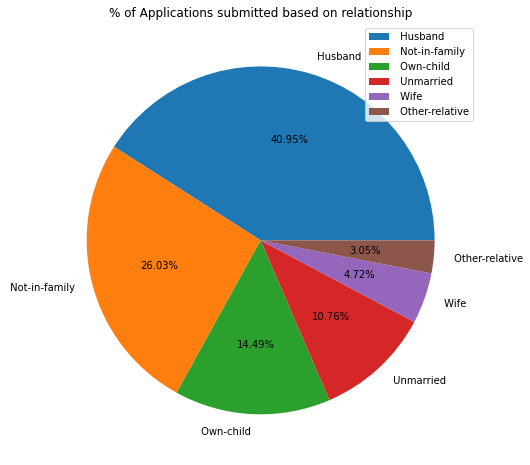

In [ ]:
# relationship
get_pie_chart(data, "relationship", "% of Applications submitted based on relationship")

## Capital Gain

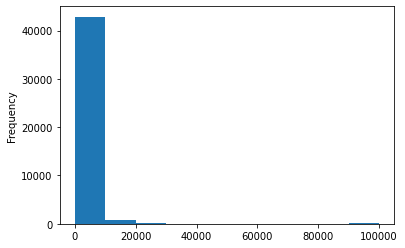

In [ ]:
# capital_gain
# get_pie_chart(data, "capital_gain", "% of Applications submitted based on capital_gain")
data['capital_gain'].plot(kind='hist')

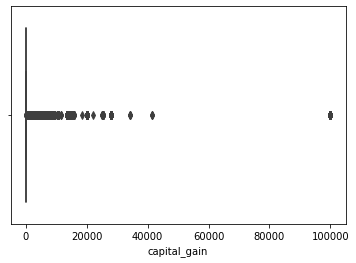

In [ ]:
sns.boxplot(data['capital_gain'])

In [ ]:
data["capital_gain"].describe()

count    43944.000000
mean      1119.629073
std       7576.548983
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [ ]:
data[data.capital_gain > 0]['capital_gain'].describe()
# People who had capital gain can be binned as binary feature. Can be explore further too

count     3738.000000
mean     13162.380952
std      22725.649810
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital_gain, dtype: float64

0    40206
3     1599
4     1070
2     1004
1       65
Name: capital_gain_status, dtype: int64
##############################


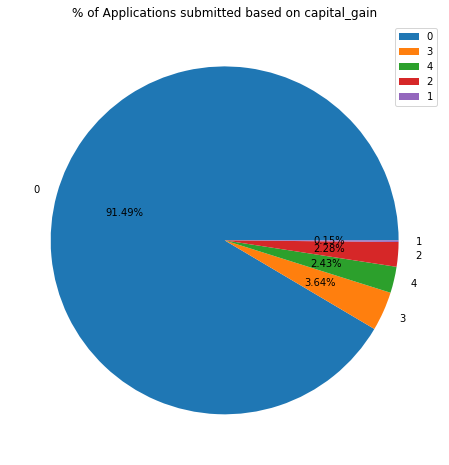

In [ ]:
# df1['feat'] = np.where(df1['stream'] == 2, 10,20)
def capital_gain_binning(gain):
  if gain <= 0:
    return 0
  elif gain < 1000:
    return 1
  elif gain < 4000:
    return 2
  elif gain < 10000:
    return 3
  else:
    return 4
# data["capital_gain_status"] = np.where(data['capital_gain'] >0, 1,0)
data["capital_gain_status"] = data["capital_gain"].apply(capital_gain_binning)
get_pie_chart(data, "capital_gain_status", "% of Applications submitted based on capital_gain")

## Capital loss

count    43944.000000
mean        90.300269
std        408.263819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3900.000000
Name: capital_loss, dtype: float64


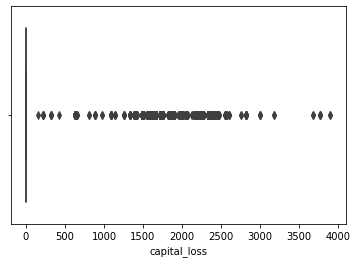

In [ ]:
print(data["capital_loss"].describe())
sns.boxplot(data['capital_loss'])

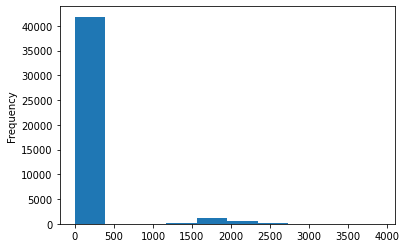

In [ ]:
data['capital_loss'].plot(kind='hist')

In [ ]:
data[data.capital_loss > 0]['capital_loss'].describe()

count    2122.000000
mean     1870.007069
std       351.623212
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      3900.000000
Name: capital_loss, dtype: float64

2    41865
1     1637
0      442
Name: capital_loss_status, dtype: int64
##############################


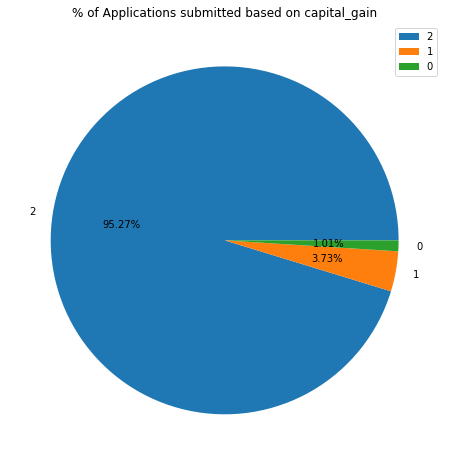

In [ ]:
def capital_loss_binning(loss):
  if loss > 2000:
    return 0
  elif loss > 1000:
    return 1
  else:
    return 2
# data["capital_gain_status"] = np.where(data['capital_gain'] >0, 1,0)
data["capital_loss_status"] = data["capital_loss"].apply(capital_loss_binning)
get_pie_chart(data, "capital_loss_status", "% of Applications submitted based on capital_gain")

In [ ]:
# Drop capital gain and loss
data.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

## Hours per week

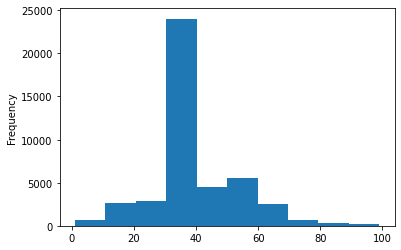

In [ ]:
data['hours_per_week'].plot(kind='hist')

count    43944.000000
mean        41.056071
std         12.020119
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64


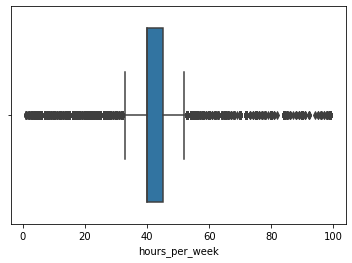

In [ ]:
print(data["hours_per_week"].describe())
sns.boxplot(data['hours_per_week'])

In [ ]:
data['hours_per_week'] = remove_outlier_IQR (data['hours_per_week'])
data = data[data['hours_per_week'].notna()]
data["hours_per_week"].describe()

count    32334.000000
mean        41.640255
std          4.071301
min         33.000000
25%         40.000000
50%         40.000000
75%         44.000000
max         52.000000
Name: hours_per_week, dtype: float64

In [ ]:
data["hours_per_week"].isnull().sum()

0

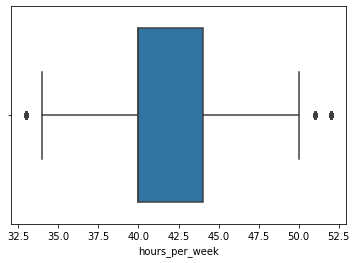

In [ ]:
sns.boxplot(data['hours_per_week'])

0    23903
1     8431
Name: approved, dtype: int64
##############################


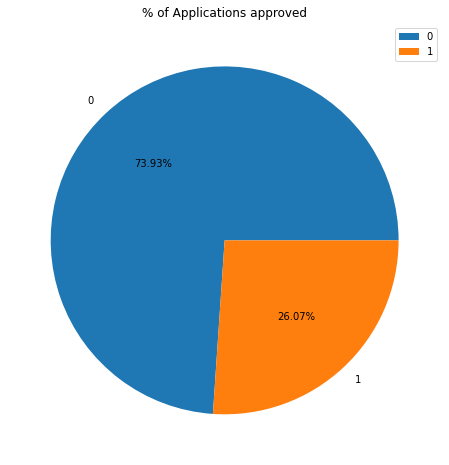

In [ ]:
get_pie_chart(data, "approved", "% of Applications approved")

## Other variables with null value
- inquiry_purpose_code     1291
- institute_type              0
- account_type                0
- asset_class_cd          35730
- asset_code                 82
- portfolio_type              6

13.0    14416
99.0     6381
7.0      4188
16.0     2591
2.0      1784
14.0      824
6.0       353
1.0       258
10.0      131
8.0       126
5.0        97
3.0        89
11.0       83
4.0        31
17.0       17
18.0        5
9.0         5
12.0        3
Name: inquiry_purpose_code, dtype: int64
##############################


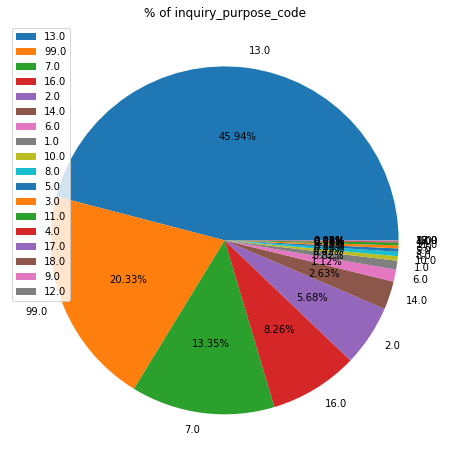

In [ ]:
# inquiry_purpose_code
get_pie_chart(data, "inquiry_purpose_code", "% of inquiry_purpose_code")
data = data[data['inquiry_purpose_code'].notna()]

PVT    18114
NBF    11328
PUB      911
HFC      669
BRO      219
FOR       80
INS       32
COB       22
TEL        4
SRC        3
Name: institute_type, dtype: int64
##############################


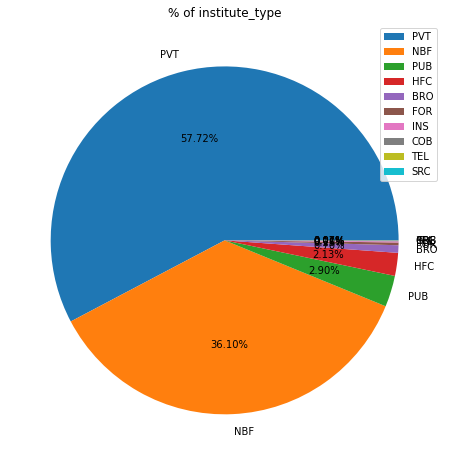

In [ ]:
# institute_type
get_pie_chart(data, "institute_type", "% of institute_type")

5      18194
189     5146
123     1855
47      1038
173     1004
191      903
58       831
130      736
999      541
121      259
184      128
178      123
177      102
224       87
176       87
227       65
195       54
172       49
213       30
221       24
185       23
179       23
226       18
181       10
240        9
228        9
187        8
167        5
170        4
223        4
197        3
198        3
175        3
168        2
220        1
222        1
Name: account_type, dtype: int64
##############################


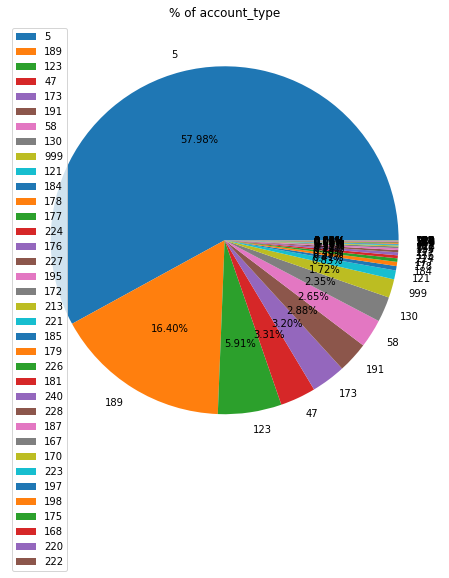

In [ ]:
# account_type
get_pie_chart(data, "account_type", "% of account_type")

default    24585
S           6188
Unknown      220
B            165
L             97
D             79
M             47
-1             1
Name: asset_class_cd, dtype: int64
##############################


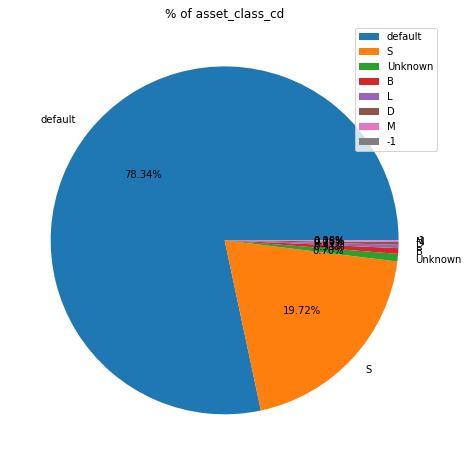

In [ ]:
data["asset_class_cd"].replace({"?": "Unknown", "01": "default"}, inplace=True)
data["asset_class_cd"].fillna("default", inplace=True)
get_pie_chart(data, "asset_class_cd", "% of asset_class_cd")

1.0     30323
2.0       828
4.0       123
19.0       46
Name: asset_code, dtype: int64
##############################


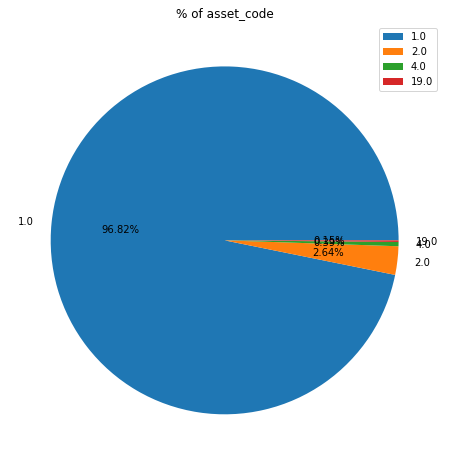

In [ ]:
# asset_code
get_pie_chart(data, "asset_code", "% of asset_code")

In [ ]:
# data["asset_code"].interpolate(method ='linear', limit_direction ='forward')
# dropping where missing value
# print(data.shape)
data = data[data['asset_code'].notna()]
data = data[data['portfolio_type'].notna()]


# Feature Engineering

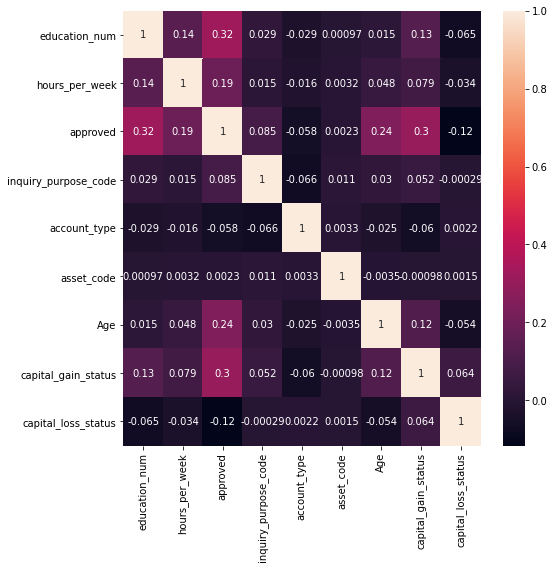

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
cat_columns = data.columns[(data.dtypes =='object').values].tolist()
cat_columns

['gender',
 'workclass',
 'marital_status',
 'occupation',
 'relationship',
 'institute_type',
 'asset_class_cd',
 'portfolio_type']

In [ ]:
data.shape

(31315, 17)

In [ ]:
#Converting Some Non-Numerical Columns to Dummies [one-hot] 
data_transformed = pd.get_dummies(data, columns=["gender", "workclass", "marital_status", "occupation", "relationship", "institute_type", "asset_class_cd", "portfolio_type"])
data_transformed

,education_num,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code,Age,capital_gain_status,capital_loss_status,gender_ Female,gender_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,institute_type_TEL,asset_class_cd_-1,asset_class_cd_B,asset_class_cd_D,asset_class_cd_L,asset_class_cd_M,asset_class_cd_S,asset_class_cd_Unknown,asset_class_cd_default,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
1,10.0,48.0,0,13.0,5,1.0,51.0,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.0,50.0,0,13.0,5,1.0,48.0,0,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,10.0,50.0,0,13.0,47,1.0,35.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
7,10.0,50.0,0,13.0,5,1.0,24.0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8,14.0,45.0,0,10.0,5,1.0,44.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45213,15.0,40.0,1,14.0,5,1.0,55.0,4,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
45218,15.0,40.0,1,7.0,5,1.0,44.0,4,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
45219,15.0,45.0,1,13.0,189,1.0,57.0,4,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
45220,13.0,40.0,1,7.0,5,1.0,42.0,4,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# #Converting Some Non-Numerical Columns to Numerical 
# temp_data = data.copy()
# from sklearn.preprocessing import LabelEncoder
 
# for col in cat_columns:
#         globals()['LE_{}'.format(col)] = LabelEncoder()
#         temp_data[col] = globals()['LE_{}'.format(col)].fit_transform(temp_data[col])
# temp_data.head() 
data_transformed.corr()["approved"]

education_num             0.321678
hours_per_week            0.191816
approved                  1.000000
inquiry_purpose_code      0.085192
account_type             -0.058019
                            ...   
asset_class_cd_default    0.088524
portfolio_type_F         -0.007326
portfolio_type_I         -0.086641
portfolio_type_M          0.044550
portfolio_type_R          0.071522
Name: approved, Length: 67, dtype: float64

In [ ]:
features = data_transformed.drop(['approved'], axis=1)
label = data_transformed['approved']
features.shape

(31315, 66)

In [ ]:
# data_transformed.isnull().sum()

# ML Model

In [ ]:
# Scaling Features
# features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features

,education_num,hours_per_week,inquiry_purpose_code,account_type,asset_code,Age,capital_gain_status,capital_loss_status,gender_ Female,gender_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,institute_type_TEL,asset_class_cd_-1,asset_class_cd_B,asset_class_cd_D,asset_class_cd_L,asset_class_cd_M,asset_class_cd_S,asset_class_cd_Unknown,asset_class_cd_default,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,0.600000,0.789474,0.122449,0.000000,0.0,0.568966,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.533333,0.894737,0.122449,0.000000,0.0,0.517241,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.600000,0.894737,0.122449,0.042254,0.0,0.293103,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.600000,0.894737,0.122449,0.000000,0.0,0.103448,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.866667,0.631579,0.091837,0.000000,0.0,0.448276,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31310,0.933333,0.368421,0.132653,0.000000,0.0,0.637931,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
31311,0.933333,0.368421,0.061224,0.000000,0.0,0.448276,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
31312,0.933333,0.631579,0.122449,0.185111,0.0,0.672414,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

In [ ]:
features.isnull().sum()

education_num             0
hours_per_week            0
inquiry_purpose_code      0
account_type              0
asset_code                0
                         ..
asset_class_cd_default    0
portfolio_type_F          0
portfolio_type_I          0
portfolio_type_M          0
portfolio_type_R          0
Length: 66, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Logistic Model Test Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Test Accuracy :  83.80967587418169 %

Confusion matrix :
[[4215  377]
 [ 637 1034]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4592
           1       0.73      0.62      0.67      1671

    accuracy                           0.84      6263
   macro avg       0.80      0.77      0.78      6263
weighted avg       0.83      0.84      0.83      6263



In [ ]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  84.48028101548779 %

Confusion matrix :
[[4256  336]
 [ 636 1035]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4592
           1       0.75      0.62      0.68      1671

    accuracy                           0.84      6263
   macro avg       0.81      0.77      0.79      6263
weighted avg       0.84      0.84      0.84      6263



# Evaluation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [ ]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[90.88296344 90.57959444 89.174517   66.35797541 15.21634999] 

70.44228005748045


In [ ]:
# Support Vector Machine classification

# results=cross_val_score(svc_model,features,label,cv=kfold)
# print(results*100,'\n')

# print(np.mean(results)*100)

## other improvements


* Univariate Analysis
* MultiVariate analysis
* Class imbalance using smote
* More feature engineering
* Missing Value fix
* Grid Search or Random Search
* Multiple other algorithms experimentation
* ANNs explore



# Approval limit prediction



In [ ]:
# Divide into 3 clusters [Selecting the number of clusters with silhouette analysis on KMeans clustering¶]
# Identify cluster behaviour
# Assign credit limit [0-2, 3-5, 5-8]

In [ ]:
# range(2,22)
# https://link.medium.com/sxXYOhvvChb

In [ ]:
# Feature for clustering
# Select predicted Clusters
data_transformed.columns

Index(['education_num', 'hours_per_week', 'approved', 'inquiry_purpose_code',
       'account_type', 'asset_code', 'Age', 'capital_gain_status',
       'capital_loss_status', 'gender_ Female', 'gender_ Male',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Pr

In [ ]:
# Features used for cluster
# Predicted cofiendence score can be one more feature in cluster
col_name = ['education_num', 'Age', 'capital_gain_status', 'asset_class_cd_-1',
       'asset_class_cd_B', 'asset_class_cd_D', 'asset_class_cd_L',
       'asset_class_cd_M', 'asset_class_cd_S', 'asset_class_cd_Unknown',
       'asset_class_cd_default', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay']

In [ ]:
approved_data_org = data_transformed[data_transformed['approved'] == 1]


In [ ]:
approved_data = data_transformed[data_transformed['approved'] == 1]
approved_data.drop(['approved'], axis=1, inplace=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans


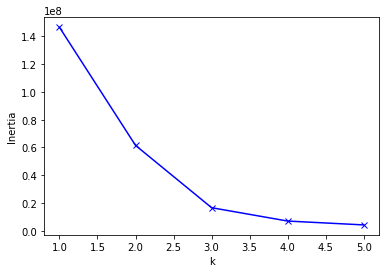

In [ ]:
inertia = []
range_values = range(1, 6)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(approved_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(approved_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(approved_data, Kmean.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score: 0.6959904754073757


In [ ]:
pca = PCA(2)
pca_data = pca.fit_transform(approved_data)

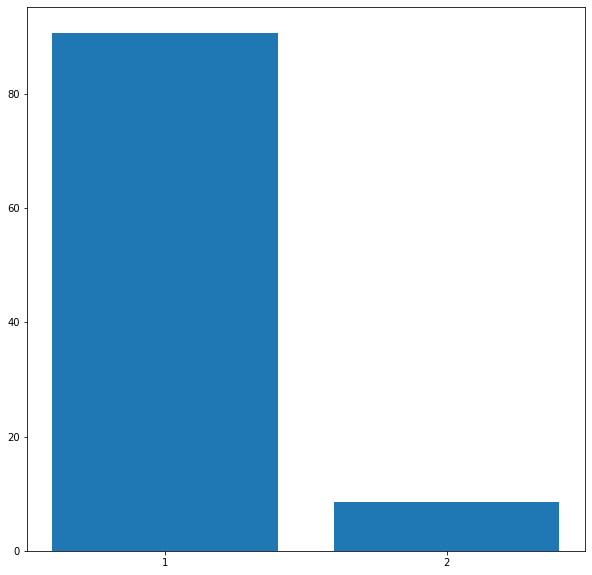

In [ ]:
# plot and check the variance of the components.

plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()


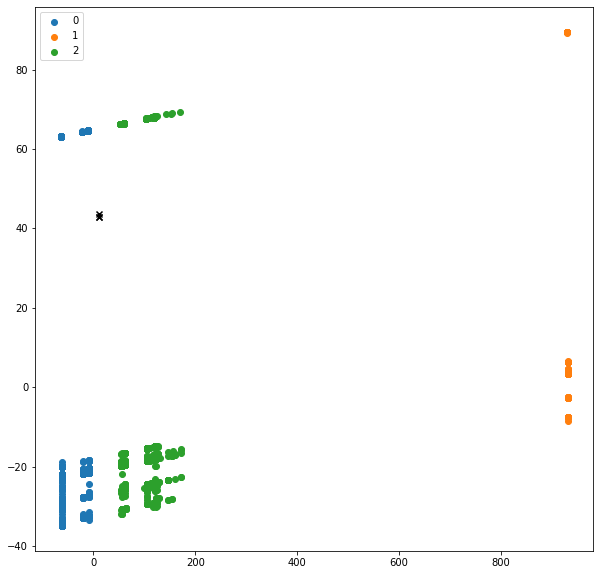

In [ ]:
centers = np.array(Kmean.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(pca_data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(pca_data[label == i , 0] , pca_data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = approved_data.index.values
cluster_map['cluster'] = Kmean.labels_

In [ ]:
cluster_map

,data_index,cluster
0,34015,2
1,34016,2
2,34017,2
3,34018,0
4,34019,0
...,...,...
8230,45213,2
8231,45218,2
8232,45219,0
8233,45220,2


In [ ]:
# merge  cluster_map and approvaed_data_org
merged = pd.merge(approved_data_org, cluster_map, left_index=True, right_on='data_index')
merged

,education_num,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code,Age,capital_gain_status,capital_loss_status,gender_ Female,gender_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,institute_type_TEL,asset_class_cd_-1,asset_class_cd_B,asset_class_cd_D,asset_class_cd_L,asset_class_cd_M,asset_class_cd_S,asset_class_cd_Unknown,asset_class_cd_default,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R,data_index,cluster
0,11.0,40.0,1,99.0,5,1.0,54.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,34015,2
1,9.0,40.0,1,13.0,5,1.0,52.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,34016,2
2,9.0,40.0,1,14.0,58,2.0,42.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,34017,2
3,13.0,50.0,1,7.0,189,1.0,63.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,34018,0
4,13.0,40.0,1,13.0,189,1.0,27.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,34019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,15.0,40.0,1,14.0,5,1.0,55.0,4,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,45213,2
8231,15.0,40.0,1,7.0,5,1.0,44.0,4,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,45218,2
8232,15.0,45.0,1,13.0,189,1.0,57.0,4,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,45219,0
8233,13.0,40.0,1,7.0,5,1.0,42.0,4,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,45220,2


In [ ]:
# Checking behaviour of each cluster and assigning RED, AMBER, Green status
merged["cluster"].value_counts()

2    5787
0    2351
1      97
Name: cluster, dtype: int64

In [ ]:
merged_actual = pd.merge(data, cluster_map, left_index=True, right_on='data_index')
merged_actual

,gender,workclass,education_num,marital_status,occupation,relationship,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,Age,capital_gain_status,capital_loss_status,data_index,cluster
0,Male,Private,11.0,Married-civ-spouse,Exec-managerial,Husband,40.0,1,99.0,PVT,5,default,1.0,R,54.0,0,2,34015,2
1,Male,Private,9.0,Married-civ-spouse,Protective-serv,Husband,40.0,1,13.0,PVT,5,default,1.0,R,52.0,0,2,34016,2
2,Male,Private,9.0,Married-civ-spouse,Transport-moving,Husband,40.0,1,14.0,HFC,58,default,2.0,M,42.0,0,2,34017,2
3,Male,Private,13.0,Married-civ-spouse,Prof-specialty,Husband,50.0,1,7.0,PVT,189,default,1.0,I,63.0,0,2,34018,0
4,Male,Private,13.0,Married-civ-spouse,Adm-clerical,Husband,40.0,1,13.0,NBF,189,default,1.0,I,27.0,0,2,34019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,Male,Self-emp-inc,15.0,Married-civ-spouse,Prof-specialty,Husband,40.0,1,14.0,PVT,5,default,1.0,R,55.0,4,2,45213,2
8231,Male,Private,15.0,Married-spouse-absent,Prof-specialty,Not-in-family,40.0,1,7.0,PVT,5,default,1.0,R,44.0,4,2,45218,2
8232,Male,Self-emp-inc,15.0,Married-civ-spouse,Prof-specialty,Husband,45.0,1,13.0,NBF,189,default,1.0,I,57.0,4,2,45219,0
8233,Male,Private,13.0,Married-civ-spouse,Craft-repair,Husband,40.0,1,7.0,PVT,5,default,1.0,R,42.0,4,2,45220,2


In [ ]:
cluster_2 = merged_actual[merged_actual['cluster'] ==2]

0    4405
3     678
4     635
2      69
Name: capital_gain_status, dtype: int64
##############################


ValueError: ignored

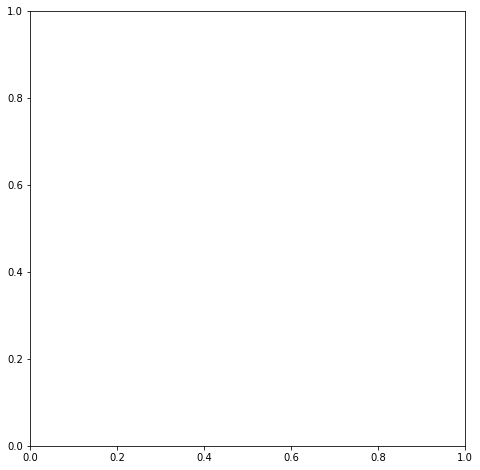

In [ ]:
# get_pie_chart(cluster_2, "capital_gain_status", "based on age status")